In [109]:
#import bs4 as bs 
import urllib.request
import re
import pandas as pd
from bs4 import BeautifulSoup
#import numpy as np
import requests
from requests import get
#from time import sleep
#from random import randint
from matplotlib import pyplot
import seaborn as sns

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from datetime import datetime

In [2]:
#! pip install bs4
#! pip install urllib
#! pip install re

In [3]:
#link = "https://www.cnsc.gov.co/index.php/autos-de-cumplimiento-436-de-2017-servicio-nacional-de-aprendizaje-sena?start="

In [4]:
#req= urllib.request.Request(link,headers={'User-Agent':'Mozilla/5.0'})
#wp=urllib.request.urlopen(req)
#source=wp.read()
#wp.close()
#sp=BeautifulSoup(source,'html.parser')

In [5]:
#w=sp.find_all("div", class_="pd-button-details")

In [6]:
#type(w)

In [7]:
#solo coge 70
#y=[]
#for x in sp.find_all("div", class_="pd-fdesc"):
#    y.append(str(x.text))
#len(y)

In [8]:
#res= pd.DataFrame({'day':[],'month':[],'year':[]},index=range(0,7))
#resu=[]
#for i in range(len(y)):
#    try:
#        day = re.search(r'(\d\d)-(\d\d)-(\d\d\d\d)', y[i]).group(1)
#        month = re.search(r'(\d\d)-(\d\d)-(\d\d\d\d)', y[i]).group(2)
#        year = re.search(r'(\d\d)-(\d\d)-(\d\d\d\d)', y[i]).group(3)
#        res= day+ '-' + month + '-' + year
#    except:
#        pass
#    resu.append(res)
#len(resu)

In [114]:
pages = np.arange(0, 490, 70)
paginas=[]
Soup=[]
resu=[]
y=[]
print("cantidad original de paginas",len(paginas))
for i in pages:
    paginas.append("https://www.cnsc.gov.co/index.php/autos-de-cumplimiento-436-de-2017-servicio-nacional-de-aprendizaje-sena?start=" + str(i))
    print("cantidad final de paginas =", len(paginas))
print("cantidad original en y", len(y))
for z in paginas:
    req= urllib.request.Request(z,headers={'User-Agent':'Mozilla/5.0'})
    wp=urllib.request.urlopen(req)
    source=wp.read()
    wp.close()
    sp=BeautifulSoup(source,'html.parser')
    for x in sp.find_all("div", class_="pd-fdesc"):
        y.append(str(x.text))
    print("cantidad final en y", len(y))
for a in range(len(y)):
    try:
        #day = re.search(r'(\d\d)-(\d\d)-(\d\d\d\d)', y[a]).group(1)
        month = re.search(r'(\d\d)-(\d\d)-(\d\d\d\d)', y[a]).group(2)
        year = re.search(r'(\d\d)-(\d\d)-(\d\d\d\d)', y[a]).group(3)
        res= month + '-' + year
    except:
        pass
    resu.append(res)
len(resu)

cantidad original de paginas 0
cantidad final de paginas = 1
cantidad final de paginas = 2
cantidad final de paginas = 3
cantidad final de paginas = 4
cantidad final de paginas = 5
cantidad final de paginas = 6
cantidad final de paginas = 7
cantidad original en y 0
cantidad final en y 70
cantidad final en y 140
cantidad final en y 208
cantidad final en y 278
cantidad final en y 348
cantidad final en y 418
cantidad final en y 421


421

In [115]:
resu = [i for i in resu if i != '18-2020']
len(resu)

418

In [116]:
fecha=[]
for i in resu:
    ej=datetime.strptime(i,'%m-%Y')
    fecha.append(ej) 
temp= pd.DataFrame(fecha).value_counts()
temp
df = temp.rename_axis('Mes').reset_index(name='Frecuencia')
df

,Mes,Frecuencia
0,2019-08-01,195
1,2021-01-01,46
2,2021-03-01,36
3,2018-04-01,34
4,2020-11-01,32
5,2021-05-01,16
6,2020-10-01,12
7,2020-08-01,9
8,2020-05-01,8
9,2021-04-01,7


TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

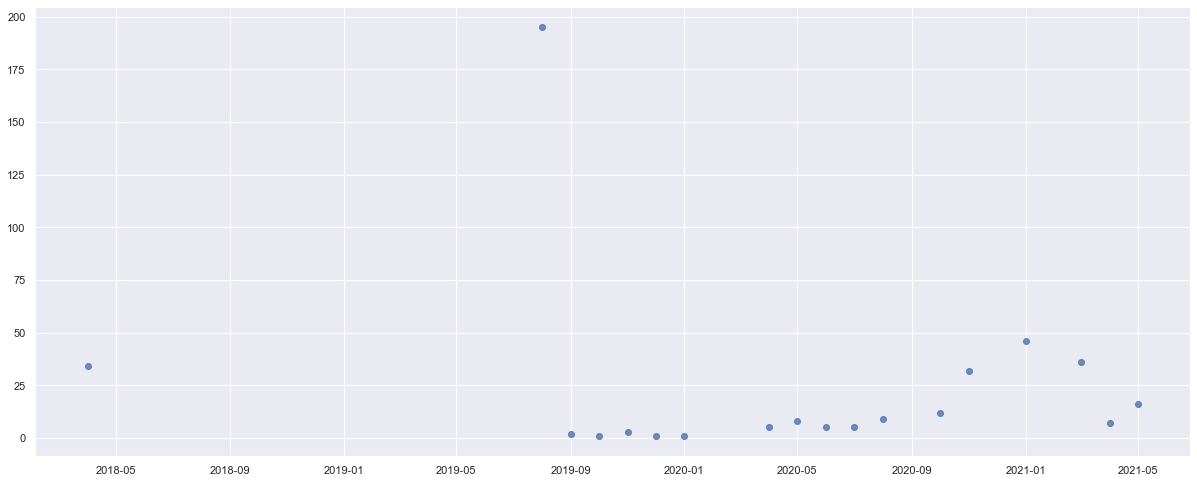

In [120]:
a4_dims = (20.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.set_theme(style="darkgrid")
sns.regplot(x=df.Mes, y=df.Frecuencia,
             data=df)